<b>WEEK-1: WATER QUALITY PREDICTION</b>

<b>Task: Data Loading, Cleaning, and Initial Exploration</b> 

In [3]:
# import requried libraries
import pandas as pd
import numpy as np

In [4]:
# Load the dataset
df = pd.read_csv('PB_All_2000_2021.csv',sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [5]:
print("📋 Dataset Info:")
print(df.info())

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB
None


In [6]:
# Convert 'date' column from object to datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
print("📆 'date' column converted to datetime type:")
df.info()

📆 'date' column converted to datetime type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [7]:
print("📊 Descriptive Statistics:")
df.describe()

📊 Descriptive Statistics:


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
count,2861.000000,2861,2858.000000,2860.000000,2845.000000,2858.000000,2860.000000,2858.000000,2812.000000,2833.000000,2812.000000
mean,12.397064,2010-05-02 22:53:33.701502976,0.758734,4.316182,12.931905,9.508902,4.316846,0.246128,59.362313,0.418626,93.731991
min,1.000000,2000-01-10 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000
25%,8.000000,2005-03-10 00:00:00,0.080000,2.160000,6.000000,7.092500,1.390000,0.030000,27.052500,0.130000,26.800000
50%,14.000000,2010-06-04 00:00:00,0.220000,3.800000,10.000000,8.995000,2.800000,0.059000,37.800000,0.270000,33.900000
75%,16.000000,2015-08-11 00:00:00,0.500000,5.800000,15.000000,11.520000,5.582500,0.125750,64.640000,0.470000,45.607500
max,22.000000,2021-04-07 00:00:00,39.427000,50.900000,595.000000,90.000000,133.400000,109.000000,3573.400000,13.879000,5615.280000
std,6.084226,NaN,2.486247,2.973997,16.543097,4.428260,6.881188,2.182777,96.582641,0.771326,394.512184


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,2861.0,12.397064,1.0,8.0,14.0,16.0,22.0,6.084226
date,2861,2010-05-02 22:53:33.701502976,2000-01-10 00:00:00,2005-03-10 00:00:00,2010-06-04 00:00:00,2015-08-11 00:00:00,2021-04-07 00:00:00,NaN
NH4,2858.0,0.758734,0.0,0.08,0.22,0.5,39.427,2.486247
BSK5,2860.0,4.316182,0.0,2.16,3.8,5.8,50.9,2.973997
Suspended,2845.0,12.931905,0.0,6.0,10.0,15.0,595.0,16.543097
O2,2858.0,9.508902,0.0,7.0925,8.995,11.52,90.0,4.42826
NO3,2860.0,4.316846,0.0,1.39,2.8,5.5825,133.4,6.881188
NO2,2858.0,0.246128,0.0,0.03,0.059,0.12575,109.0,2.182777
SO4,2812.0,59.362313,0.0,27.0525,37.8,64.64,3573.4,96.582641
PO4,2833.0,0.418626,0.0,0.13,0.27,0.47,13.879,0.771326


In [9]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [10]:
print("Null Values per Column:")
print(df.isnull().sum())

Null Values per Column:
id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
year          0
month         0
dtype: int64


In [11]:
print("Dataset Shape (rows, columns):", df.shape)

Dataset Shape (rows, columns): (2861, 13)


<b>Eliminate rows with any missing/null values</b>

In [13]:
df_cleaned = df.dropna()
print("Null values dropped. New shape:", df_cleaned.shape)

Null values dropped. New shape: (2776, 13)


In [14]:
df_sorted = df_cleaned.sort_values(by=['id', 'date'])
print("Data sorted by 'id' and 'date'.")
df_sorted.head()

Data sorted by 'id' and 'date'.


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [15]:
df_cleaned.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

<b>WEEK-2: WATER QUALITY PREDICTION</b>

In [17]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df1 = df_cleaned.copy()

In [19]:
df1

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85,2020,10
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020,10
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17,2020,12
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49,2021,1


In [20]:
df1.isnull().sum()

id           0
date         0
NH4          0
BSK5         0
Suspended    0
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

In [21]:
visual = df1[['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']]


📈 Plotting histograms of features...


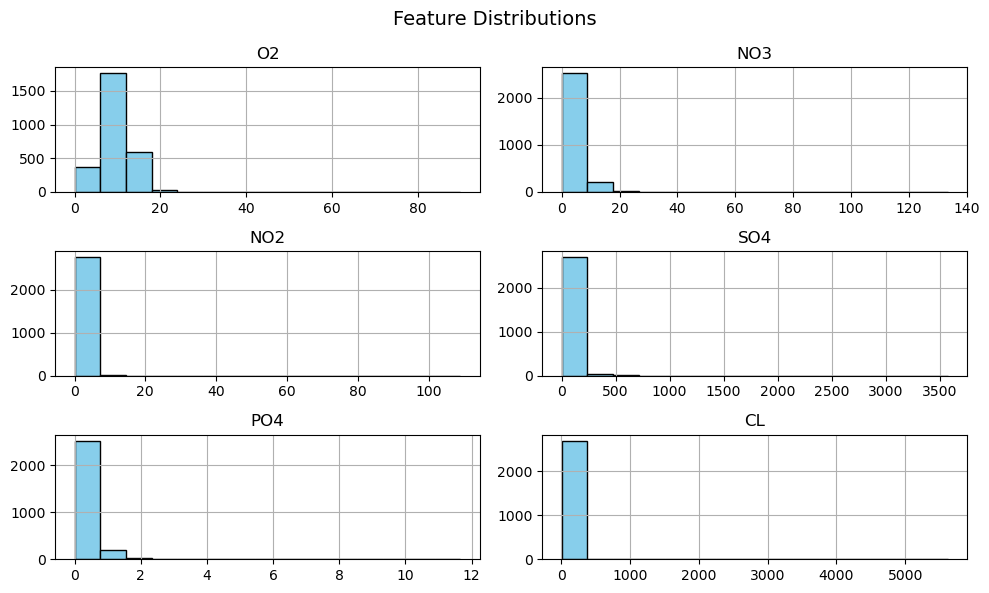

In [22]:
import matplotlib.pyplot as plt
print("\n📈 Plotting histograms of features...")
visual.hist(bins=15, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=14)
plt.tight_layout()
plt.show()

In [23]:
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

In [24]:
# Feature and target selection
X = df1[['id', 'year']]
y = df1[pollutants]

In [25]:
# Encoding - onehotencoder
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

In [26]:
# Train, Test and Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,  random_state=42)

In [27]:
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [28]:
# Evaluate model
y_pred = model.predict(X_test)

In [29]:
print("Model Performance on the Test Data : ")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant} : ')
    print('   MSE : ',mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2 : ',r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()

Model Performance on the Test Data : 
O2 : 
   MSE :  13.956013175637143
   R2 :  0.05380974886294487

NO3 : 
   MSE :  20.404972991911386
   R2 :  0.48456748185089704

NO2 : 
   MSE :  10.343405402058696
   R2 :  -58.203860047523236

SO4 : 
   MSE :  2275.807351900022
   R2 :  0.44815941114800695

PO4 : 
   MSE :  0.24389337547015993
   R2 :  0.4358695642923631

CL : 
   MSE :  32661.43741785968
   R2 :  0.7526035914013255



In [30]:
station_id = '22'
year_input = 2022

input_data = pd.DataFrame({'year' : [year_input], 'id' : [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input} : ")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p} : {val:2f}")


Predicted pollutant levels for station '22' in 2022 : 
  O2 : 13.246751
  NO3 : 6.938974
  NO2 : 0.074358
  SO4 : 144.841285
  PO4 : 0.459242
  CL : 67.360610


In [31]:
import joblib

joblib.dump(model, 'Pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), 'model_columns.pkl')
print("Model and columns structure are saved!")

Model and columns structure are saved!
